<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierTransform_SignalLength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Fourier Transform: Signal Length
</h1></b>

Dr. Bingsen Wang

12/20/2023
</center>

#Python Code
The Python code illustrates the Fourier transform. The Fourier transform is carried out in $t_1$ and $t_2$, which is equivalent to integrating from $-\infty$ to $\infty$ with $f(t)$ being clipped by Heaviside functions, i.e.

$$\begin{align}
\hat f(\omega) &= \int_{-\infty}^{\infty}f(t)[\Phi(t-t1)-\Phi(t-t2)]e^{-j\omega t}dt\\
&=\int_{t_1}^{t_2}f(t)e^{-j\omega t}dt
\end{align}\tag{1}$$
where $\Phi(t)$ is Heaviside function.

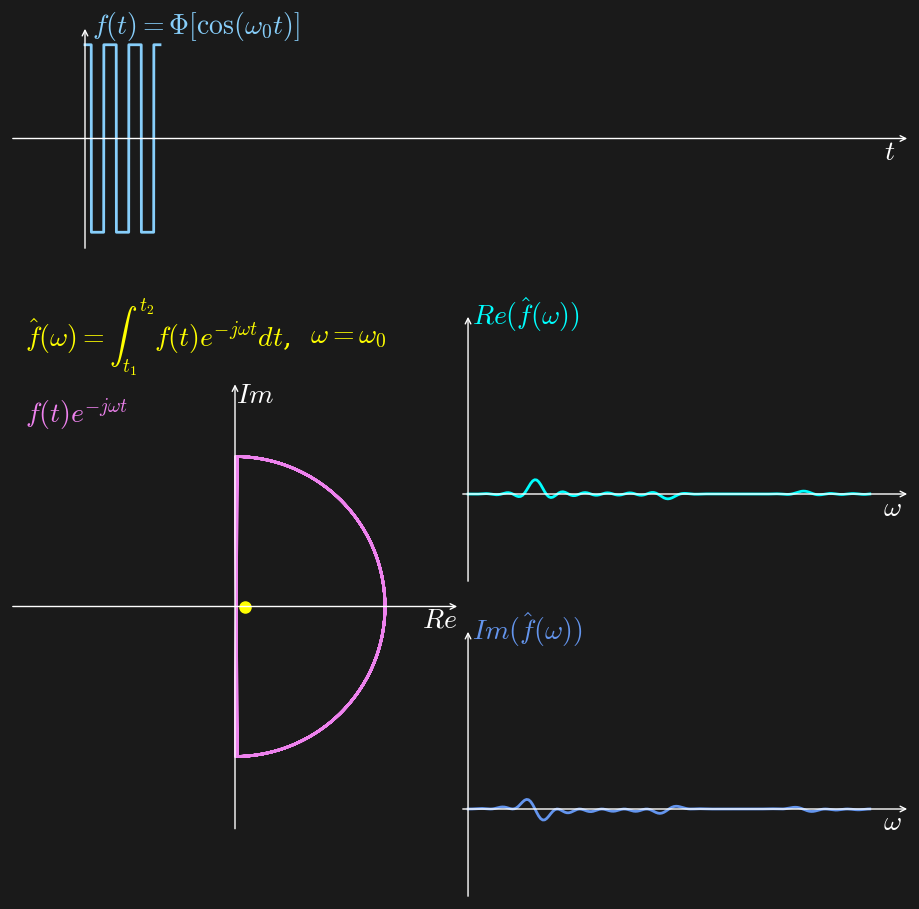

In [ ]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,exp,heaviside,zeros,array
import matplotlib.pyplot as plt
# from scipy.integrate import quad,
from scipy import integrate
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def y(t,f,theta): #cosine function
  return heaviside(cos(2*pi*f*t+theta),0)*2-1

def fourierIntegrand(t,f,f0,theta): #integrand
  return exp(-1j*2*pi*f*t)*y(t,f0,theta)

def complex_quad(g, a, b):
    t = linspace(a, b, 2501)
    x = g(t)
    return integrate.simps(y=x, x=t)

def cft(f,f0,theta,a,b):
    result = []
    for ff in f:
        result.append(complex_quad(lambda t: y(t,f0,theta)*exp(-2j*pi*ff*t), a, b))
    return array(result)

#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
# clst=['mediumblue','m','brown','navy','k',(.1,.1,.1),'w'] #colors light bg
Nf = 300
t1=0
t2=linspace(0.1,1,Nf)
theta=0
f0=30
fst = 0 #starting frequency
fnd = 6 #end frequency
fr = linspace(fst,fnd,200)#frequency ratio

fig = plt.figure(figsize=(9,9),facecolor=clst[-1])
fig.tight_layout()
ax_frame = [[[0, 0.72, 1, .25], [-.1,1.1], [-1.2,1.2]], #signal
            [[.0, .075,   .5, .5], [-1.5,1.5], [-1.5,1.5]], #Fourier transform
            [[.5, .35,   .5, .3], [-.02,1.1], [-.4,.8]], #real f(omega)
            [[.5, 0,   .5, .3], [-.02,1.1], [-.4,.8]], #imag f(omega)
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['', '$t$'],
        ['$Im$', '$Re$'],
        [r'$Re(\hat f(\omega))$', '$\omega$'],
        [r'$Im(\hat f(\omega))$', '$\omega$'],
        ] #variables for yx axes of each subplot

ax_lst=[] #axis list or the list of subplots
ytxt_lst=[] #list of y texts
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
  line_lst.append(ax.plot([], [],color=clst[k], lw=2)[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right',color=clst[-2]) #x-axis label
  if k==1:
    ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],size=20,va='top',color=clst[-2])) #y label
  else:
    ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],color=clst[k],size=20,va='center')) #y label
line_lst.append(ax_lst[1].plot([], [],color=clst[4],ls='',marker='o',markersize='8')[0])
ax_lst[1].text(-1.4,ax_frame[1][2][1]+.3,r'$\hat f(\omega) =\int_{t_1}^{t_2}f(t)e^{-j\omega t}dt$,',color=clst[4],va='center',size=20)
ax_lst[1].text(-1.4,ax_frame[1][2][1]-0.1,'$f(t)e^{-j\omega t}$',color=clst[1],va='top',size=20)
title1= ax_lst[1].text(.5,ax_frame[1][2][1]+.3,'',va='center',size=20,color=clst[4])
ytxt_lst[0].set_text(r'$f(t)=\Phi[\cos(\omega_0 t)]$')
title1.set_text(r'$\omega=\omega_0$')
# animation function. This is called sequentially
def animate(i):
  t=linspace(t1,t2[i],1024)
  yt=y(t,f0,theta)
  yft= cft(fr*f0,f0,theta,t1,t2[i])
  yft0= cft([f0],f0,theta,t1,t2[i])
  fti = fourierIntegrand(t,f0,f0,theta) #Fourier transform integrand at w0
  line_lst[0].set_data(t,yt)
  line_lst[1].set_data(fti.real,fti.imag)
  line_lst[2].set_data(fr/(fnd-fst),yft.real)
  line_lst[3].set_data(fr/(fnd-fst),yft.imag)
  line_lst[4].set_data([yft0.real],[yft0.imag])
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=500)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"FourierTransform_signalLength.mp4"
writervideo = animation.FFMpegWriter(fps=25)
anim.save(fn, writer=writervideo,dpi = 120)